In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fancyimpute import  KNN
import datetime as dt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor

C:\Users\palva\Anaconda3.1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\palva\Anaconda3.1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\palva\Anaconda3.1\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are 

In [2]:
train = pd.read_csv(r'C:\Users\palva\Downloads\club_mahindra_analytics\train.csv')
test = pd.read_csv(r'C:\Users\palva\Downloads\club_mahindra_analytics\test.csv')

In [3]:
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [4]:
test.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [5]:
variable = pd.read_excel(r'C:\Users\palva\Downloads\club_mahindra_analytics\Data_Dictionary.xlsx')
variable

,Variable,Description
0,reservation_id,Reservation ID
1,booking_date,Date of booking
2,checkin_date,Checkin date recorded at the time of booking
3,checkout_date,Checkout date recorded at the time of booking
4,channel_code,Different channels of booking
5,main_product_code,Type of product a member has purchased
6,numberofadults,Number of adults travelling
7,numberofchildren,Number of children travelling
8,persontravellingid,Type of person travelling
9,resort_region_code,Resort Region


In [6]:
train.isnull().sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spen

In [7]:
test.isnull().sum()

reservation_id                 0
booking_date                   0
checkin_date                   0
checkout_date                  0
channel_code                   0
main_product_code              0
numberofadults                 0
numberofchildren               0
persontravellingid             0
resort_region_code             0
resort_type_code               0
room_type_booked_code          0
roomnights                     0
season_holidayed_code         35
state_code_residence        2260
state_code_resort              0
total_pax                      0
member_age_buckets             0
booking_type_code              0
memberid                       0
cluster_code                   0
reservationstatusid_code       0
resort_id                      0
dtype: int64

In [8]:
train['state_code_residence'] = train['state_code_residence'].fillna(train['state_code_residence'].mode()[0])
test['state_code_residence'] = test['state_code_residence'].fillna(test['state_code_residence'].mode()[0])

In [9]:
train['season_holidayed_code'] = train['season_holidayed_code'].fillna(train['season_holidayed_code'].mode()[0])
test['season_holidayed_code'] = test['season_holidayed_code'].fillna(test['season_holidayed_code'].mode()[0])

In [10]:
#train['total_pax'] = train['numberofadults']+train['numberofchildren']
#test['total_pax'] = test['numberofadults']+test['numberofchildren']

In [11]:
train['booking_date'] = pd.to_datetime(train['booking_date'])
train['booking_month'] = train['booking_date'].dt.month
train['booking_year'] = train['booking_date'].dt.year

In [12]:
test['booking_date'] = pd.to_datetime(test['booking_date'])
test['booking_month'] = test['booking_date'].dt.month
test['booking_year'] = test['booking_date'].dt.year

In [13]:
train['checkin_date'] = pd.to_datetime(train['checkin_date'])
train['checkin_weekname'] = train['checkin_date'].dt.weekday_name

In [14]:
test['checkin_date'] = pd.to_datetime(test['checkin_date'])
test['checkin_weekname'] = test['checkin_date'].dt.weekday_name

In [15]:
train['checkout_date'] = pd.to_datetime(train['checkout_date'])
train['checkout_weekname'] = train['checkout_date'].dt.weekday_name

In [16]:
test['checkout_date'] = pd.to_datetime(test['checkout_date'])
test['checkout_weekname'] = test['checkout_date'].dt.weekday_name

In [17]:
train_feature = train.copy()
test_feature = test.copy()

## Explorative Data analysis

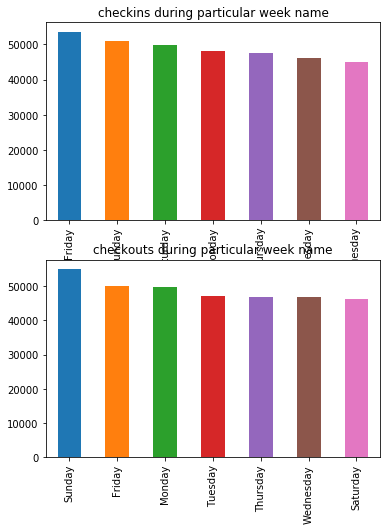

In [18]:
fig, axs = plt.subplots(2,1)
train['checkin_weekname'].value_counts().plot.bar(figsize=(6,8),ax=axs[0],title= 'checkins during particular week name')
train['checkout_weekname'].value_counts().plot.bar(figsize=(6,8),ax=axs[1],title= 'checkouts during particular week name')
#checkins are more at friday and check outs are more at sunday

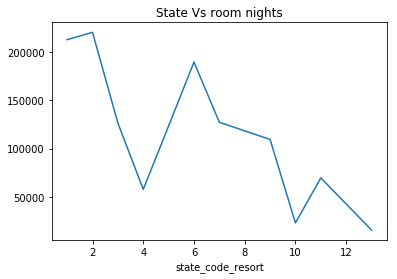

In [19]:
#in which state more room nights are booking
train.groupby(['state_code_resort'])['roomnights'].sum().plot(title='State Vs room nights')
#state 2 resort hase more room nights booked

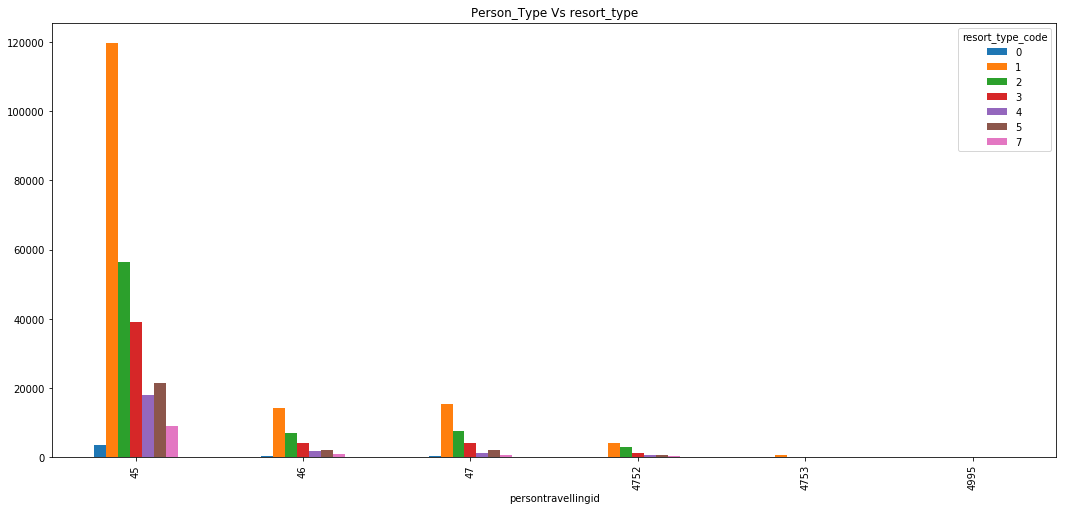

In [20]:
pd.crosstab(train['persontravellingid'],train['resort_type_code']).plot.bar(figsize=(18,8), title='Person_Type Vs resort_type')

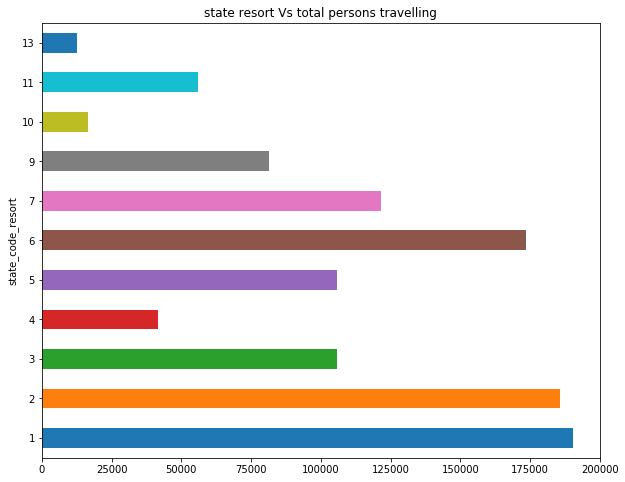

In [21]:
train.groupby(['state_code_resort'])['total_pax'].sum().plot.barh(title='state resort Vs total persons travelling',figsize=(10,8))

In [22]:
train['booking_type_code'].value_counts()

1    299016
2     42408
Name: booking_type_code, dtype: int64

booking_month,1,2,3,4,5,6,7,8,9,10,11,12,All
booking_year,,,,,,,,,,,,,
2014,1737,317,365,321,249,254,167,228,238,677,1385,2537,8475
2015,8626,9127,7872,6272,5870,5408,5903,5294,5265,5430,4695,5876,75638
2016,12797,9182,7832,6566,6597,5970,5909,6038,6016,5396,5459,5974,83736
2017,10863,11833,9408,7265,6450,6246,6262,5876,5865,5693,5741,5572,87074
2018,9766,9636,8671,6422,6558,5897,5545,5512,5714,5771,5541,5506,80539
2019,2593,831,328,267,251,180,311,301,265,219,201,215,5962
All,46382,40926,34476,27113,25975,23955,24097,23249,23363,23186,23022,25680,341424


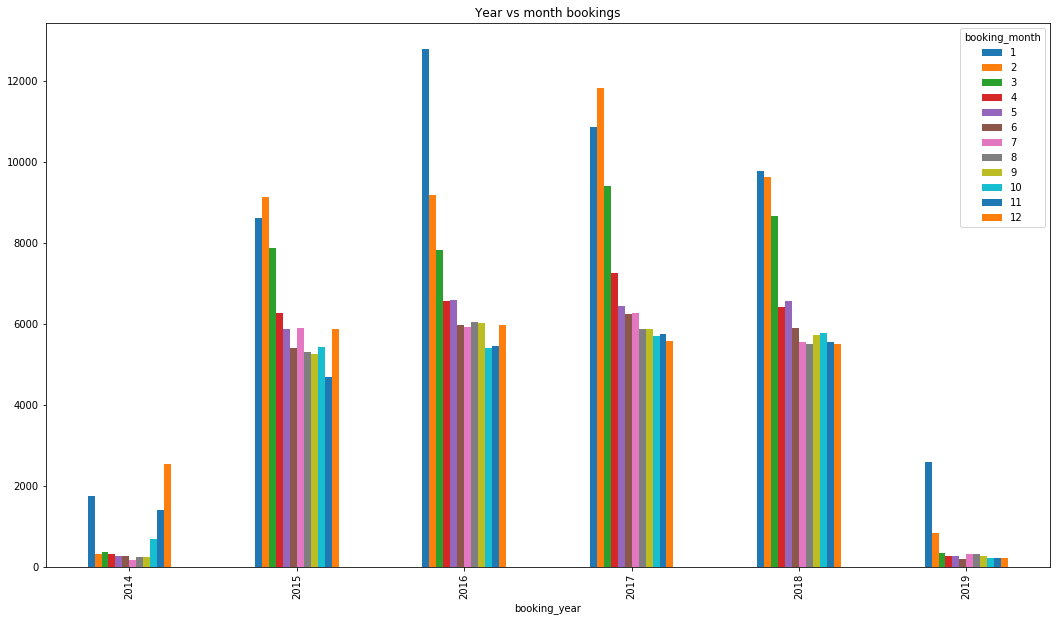

In [23]:
pd.crosstab(train['booking_year'],train['booking_month'],margins=False).plot.bar(figsize=(18,10),title='Year vs month bookings')
pd.crosstab(train['booking_year'],train['booking_month'],margins=True)

In [24]:
train['channel_code'].value_counts()

1    161225
3    128042
2     52157
Name: channel_code, dtype: int64

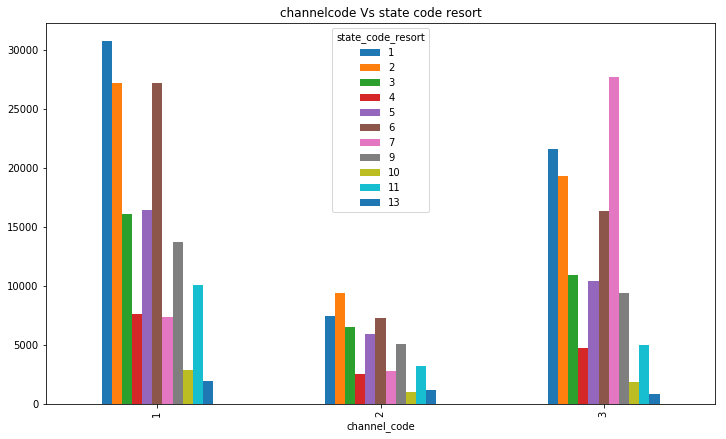

In [25]:
pd.crosstab(train['channel_code'],train['state_code_resort']).plot.bar(title='channelcode Vs state code resort',figsize=(12,7))

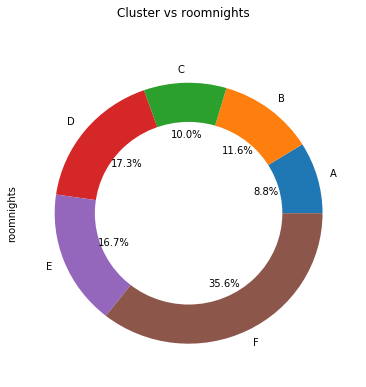

In [26]:
clu = train.groupby(['cluster_code'])['roomnights'].sum()
clu.plot.pie(subplots=True,figsize=(6,6),autopct='%1.1f%%',title='Cluster vs roomnights')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

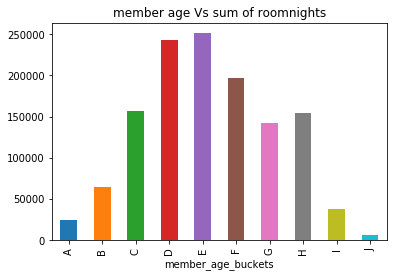

In [27]:
#rrom nights Vs agebuckets
train.groupby(['member_age_buckets'])['roomnights'].sum().plot.bar(title='member age Vs sum of roomnights')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA3E2340B8>],
      dtype=object)

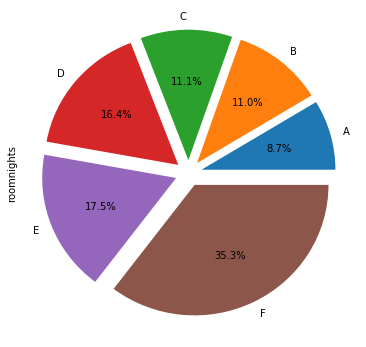

In [28]:
cluVsnight = train.groupby(['cluster_code'])['roomnights'].count()
explode = (0.1,0.1,0.1,0.1,0.1,0.1)
cluVsnight.plot.pie(subplots=True,figsize=(6,6),autopct='%1.1f%%',explode=explode)

In [29]:
train['room_type_booked_code'].value_counts()

3    137439
2    113459
4     83554
1      5374
5      1588
6        10
Name: room_type_booked_code, dtype: int64

### data encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
train_feature['resort_id'] = le.fit_transform(train_feature['resort_id'])
train_feature['member_age_buckets'] = le.fit_transform(train_feature['member_age_buckets'])
train_feature['reservationstatusid_code'] = le.fit_transform(train_feature['reservationstatusid_code'])
train_feature['cluster_code'] = le.fit_transform(train_feature['cluster_code'])

## Applying the models

In [33]:
train_feature.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'booking_month', 'booking_year',
       'checkin_weekname', 'checkout_weekname'],
      dtype='object')

In [34]:
train1 = train_feature.drop(columns={'booking_month','booking_year','checkin_weekname','checkout_weekname',
                    'booking_date','checkin_date','checkout_date','reservation_id','memberid'})
test1 = test_feature.drop(columns={'booking_month','booking_year','checkin_weekname','checkout_weekname',
                    'booking_date','checkin_date','checkout_date','reservation_id','memberid'})

In [35]:
train1.shape, test1.shape

((341424, 19), (146765, 18))

In [36]:
X_Train = train1.iloc[:,train1.columns!='amount_spent_per_room_night_scaled'].values
Y_train = train1['amount_spent_per_room_night_scaled']

In [37]:
X_Train.shape, Y_train.shape

((341424, 18), (341424,))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_Train, Y_train,test_size=0.3,random_state=1234) 

#### Gradient Boosting

In [39]:
gradient = GradientBoostingRegressor()

In [40]:
gradient.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [41]:
predict = gradient.predict(X_test)

In [42]:
np.sqrt(mean_squared_error(predict,y_test))

1.026724499935336

#### Using Random forest regression

In [43]:
rf = RandomForestRegressor(n_estimators = 200, min_samples_split = 50, verbose = 1, random_state = 42)

In [44]:
rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.9min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=50,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=42, verbose=1, warm_start=False)

In [45]:
predict_rf = rf.predict(X_test)

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.8s finished


In [46]:
np.sqrt(mean_squared_error(predict_rf,y_test))

1.0259364078231061

#### Using linear regression

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
pred_lr = lr.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(pred_lr,y_test))

1.0519892976552967

In [51]:
from lightgbm import LGBMRegressor

In [52]:
clf =  LGBMRegressor(random_state =1, n_estimators =300, n_jobs = -1,learning_rate=0.20, num_leaves=25,reg_alpha=0.0,reg_lambda=0.0, min_child_samples=3,categorical_feature = [13,15,16,17,18,19,20,26,27])

In [53]:
clf.fit(X_train,y_train)

C:\Users\palva\Anaconda3.1\lib\site-packages\lightgbm\basic.py:741: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))


LGBMRegressor(boosting_type='gbdt',
       categorical_feature=[13, 15, 16, 17, 18, 19, 20, 26, 27],
       class_weight=None, colsample_bytree=1.0, importance_type='split',
       learning_rate=0.2, max_depth=-1, min_child_samples=3,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=300,
       n_jobs=-1, num_leaves=25, objective=None, random_state=1,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [54]:
pred_lg = clf.predict(X_test)

In [55]:
np.sqrt(mean_squared_error(pred_lg,y_test))

1.0203060118657263